In [ ]:
# setup auto-reload
%load_ext autoreload
%autoreload 2

# import libraries
import pandas as pd

# import modules
from envs.cab_env import CabEnv
from envs.cab_env_v2 import CabEnvV2
from algo.basic_q_learning.q_learning import q_learning
from helpers.perfroming_helper import cab_perform
import helpers.visualising_helper as visualising_helper

In [33]:
# initialise environment
env = CabEnv()

# gather reward scheme
reward_dict = env.reward_dict

print(reward_dict)

{'step': -1, 'penalty': -30, 'final_reward': 60}


In [34]:
env.reset()
env.render()

+---------------+
|R: | : : |G: : |
| : : | : | : : |
| : : : : : : : |
| | : : : | : : |
|Y| : | : | : |B|
| : : | : : : : |
| : : | : | : : |
| : : |K: | : : |
+---------------+



In [35]:
print(f'-- Environment attributes --'
      f'\nAction space: {env.action_space.n}'
      f'\nState space: {env.observation_space.n}')

-- Environment attributes --
Action space: 6
State space: 1920


In [36]:
max_eps = 10000
episodes = list(range(1, max_eps + 1))

# Choose action selection strategy

In [37]:
# Pick a decay rate for epsilon
decay_rates = [0, 0.999, 0.99, 0.9]

result_dict_epsilon = {
    "episode": episodes
}

result_dict_epsilon_value = {
    "episode": episodes
}

for decay_rate in decay_rates:
    if decay_rate == 0:
        _, training_info = q_learning(
            env=env,
            penalty=reward_dict.get("penalty"),
            max_eps=max_eps,
            alpha=0.5,
            gamma=0.7,
            epsilon_start=1
        )
        result_dict_epsilon[decay_rate] = training_info['num_steps']
        result_dict_epsilon_value[decay_rate] = training_info['epsilon']
    else:
        _, training_info = q_learning(
            env=env,
            penalty=reward_dict.get("penalty"),
            max_eps=max_eps,
            alpha=0.5,
            gamma=0.7,
            epsilon_start=1,
            strategy='exponential',
            epsilon_decay=decay_rate
        )
        result_dict_epsilon[decay_rate] = training_info['num_steps']
        result_dict_epsilon_value[decay_rate] = training_info['epsilon']

Episode: 10000
Training finished.



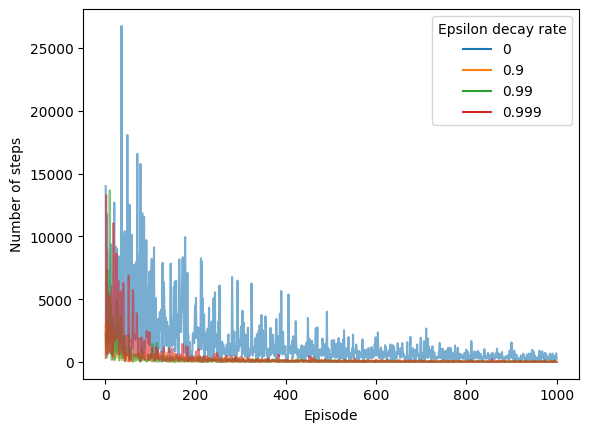

In [38]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_epsilon).head(1000),
                                      title='Steps count to win for the first 1000 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='Epsilon decay rate')

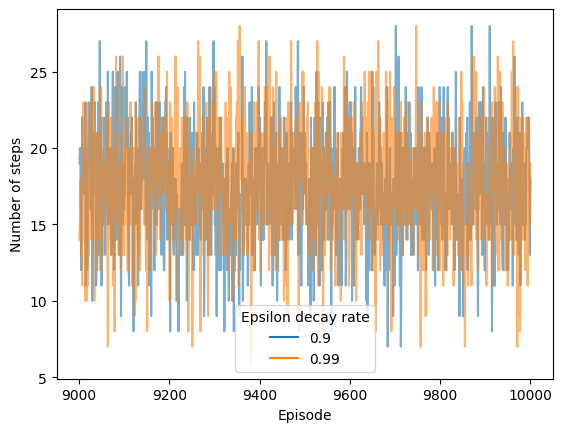

In [39]:
pd.DataFrame(result_dict_epsilon).drop([0, 0.999], axis=1)
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_epsilon).drop([0, 0.999], axis=1).tail(1000),
                                      title='Steps count to win for the last 1000 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='Epsilon decay rate')

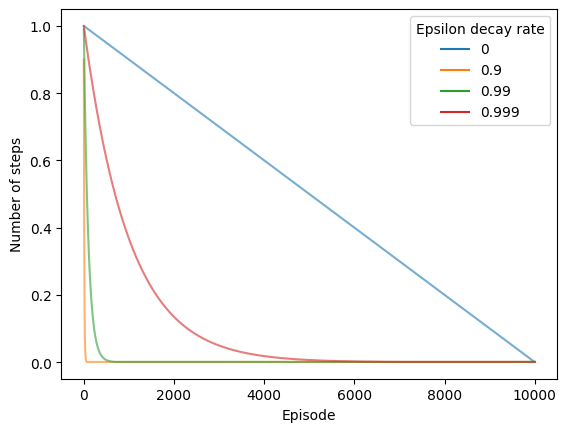

In [40]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_epsilon_value),
                                      title='Epsilon values for each decay rate',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='Epsilon decay rate')

Therefore, we can choose the best strategy is epsilon-greedy with decay method exponential with rate of 0.9

In [41]:
optimal_epsilon_strategy = 'exponential'
optimal_epsilon_decay = 0.999

# Find the best learning rates (alpha)

In [42]:
alphas_v1 = [0.1, 0.5, 0.9]

result_dict_alpha_v1 = {
    "episode": episodes
}

for alpha in alphas_v1:
    _, training_info = q_learning(
        env=env,
        penalty=reward_dict.get("penalty"),
        max_eps=max_eps,
        alpha=alpha,
        gamma=0.7,
        epsilon_start=1,
        strategy="exponential",
        epsilon_decay=optimal_epsilon_decay
    )
    result_dict_alpha_v1[alpha] = training_info["num_steps"]

Episode: 10000
Training finished.



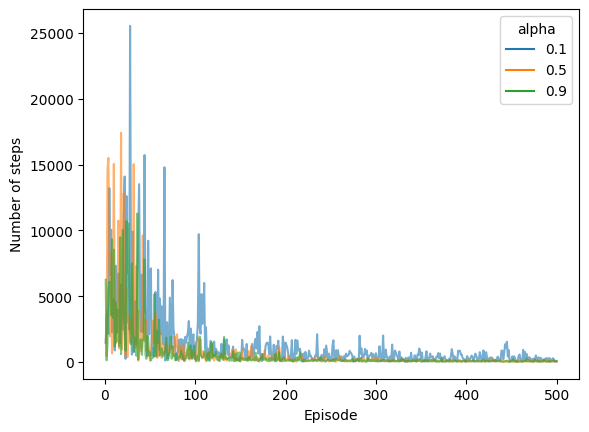

In [43]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_alpha_v1).head(500),
                                      title='Steps count to win for the first 500 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='alpha')

In [44]:
alphas_v2 = [0.5, 0.7, 0.9]

result_dict_alpha_v2 = {
    "episode": episodes
}

for alpha in alphas_v2:
    _, training_info = q_learning(
        env=env,
        penalty=reward_dict.get("penalty"),
        max_eps=max_eps,
        alpha=alpha,
        gamma=0.7,
        epsilon_start=1,
        strategy="exponential",
        epsilon_decay=optimal_epsilon_decay
    )
    result_dict_alpha_v2[alpha] = training_info["num_steps"]


Episode: 10000
Training finished.



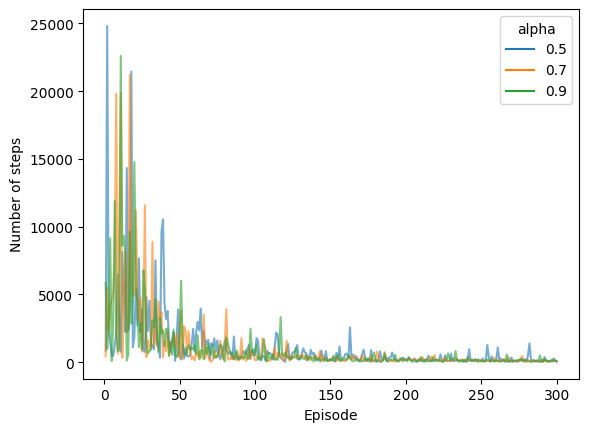

In [45]:

visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_alpha_v2).head(300),
                                      title='Steps count to win for the first 300 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='alpha')

In [46]:
alphas_v3 = [0.5, 0.6, 0.7]

result_dict_alpha_v3 = {
    "episode": episodes
}

for alpha in alphas_v3:
    _, training_info = q_learning(
        env=env,
        penalty=reward_dict.get("penalty"),
        max_eps=max_eps,
        alpha=alpha,
        gamma=0.7,
        epsilon_start=1,
        strategy="exponential",
        epsilon_decay=optimal_epsilon_decay
    )
    result_dict_alpha_v3[alpha] = training_info["num_steps"]

Episode: 10000
Training finished.



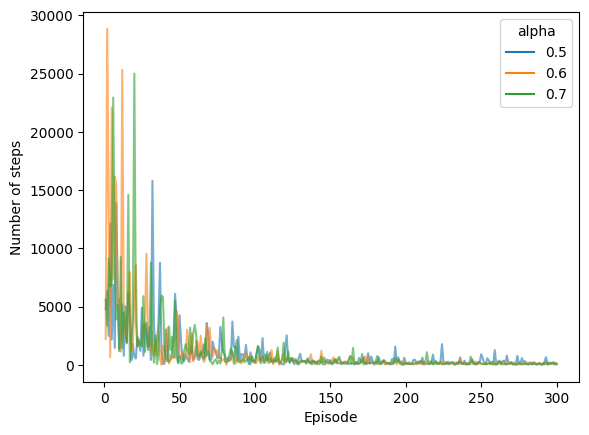

In [47]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_alpha_v3).head(300),
                                      title='Steps count to win for the first 300 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='alpha')

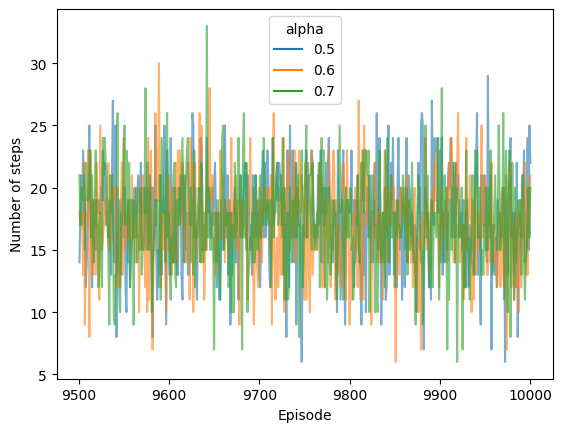

In [48]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_alpha_v3).tail(500),
                                      title='Steps count to win for the last 500 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='alpha')

Then optimal alpha is 0.7

In [49]:
optimal_alpha = 0.7

# Check for best gamma

In [50]:
gamma_v1 = [0.3, 0.5, 0.9]

result_dict_gamma_v1 = {
    "episode": episodes
}

for gamma in gamma_v1:
    _, training_info = q_learning(
        env=env,
        penalty=reward_dict.get("penalty"),
        max_eps=max_eps,
        alpha=optimal_alpha,
        gamma=gamma,
        epsilon_start=1,
        strategy="exponential",
        epsilon_decay=optimal_epsilon_decay
    )
    result_dict_gamma_v1[gamma] = training_info["num_steps"]

Episode: 10000
Training finished.



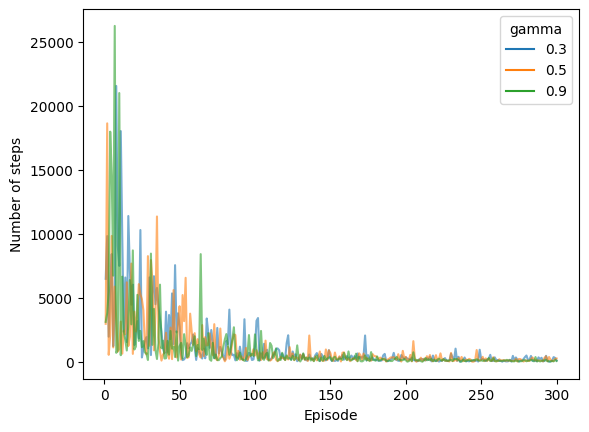

In [51]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_gamma_v1).head(300),
                                      title='Steps count to win for the first 300 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='gamma')

In [52]:
gamma_v2 = [0.5, 0.7, 0.9]

result_dict_gamma_v2 = {
    "episode": episodes
}

for gamma in gamma_v2:
    _, training_info = q_learning(
        env=env,
        penalty=reward_dict.get("penalty"),
        max_eps=max_eps,
        alpha=optimal_alpha,
        gamma=gamma,
        epsilon_start=1,
        strategy="exponential",
        epsilon_decay=optimal_epsilon_decay
    )
    result_dict_gamma_v2[gamma] = training_info["num_steps"]

Episode: 10000
Training finished.



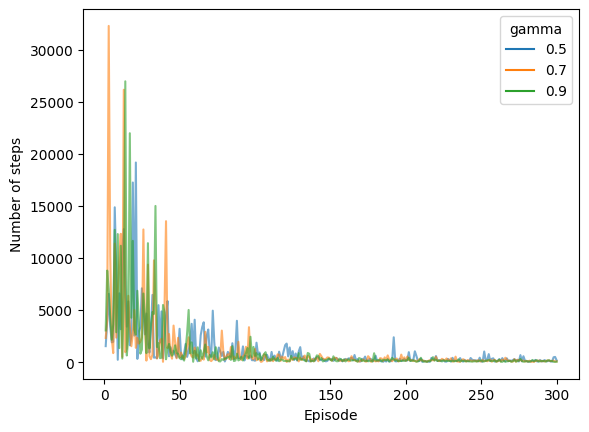

In [53]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_gamma_v2).head(300),
                                      title='Steps count to win for the first 300 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='gamma')

In [54]:
gamma_v3 = [0.5, 0.6, 0.7]

result_dict_gamma_v3 = {
    "episode": episodes
}

for gamma in gamma_v3:
    _, training_info = q_learning(
        env=env,
        penalty=reward_dict.get("penalty"),
        max_eps=max_eps,
        alpha=optimal_alpha,
        gamma=gamma,
        epsilon_start=1,
        strategy="exponential",
        epsilon_decay=optimal_epsilon_decay
    )
    result_dict_gamma_v3[gamma] = training_info["num_steps"]

Episode: 10000
Training finished.



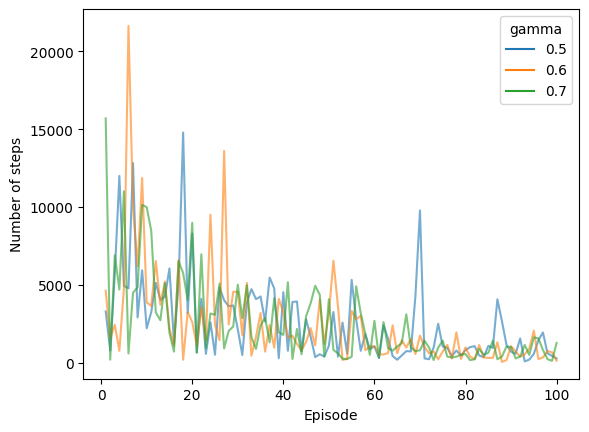

In [55]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_gamma_v3).head(100),
                                      title='Steps count to win for the first 100 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='gamma')

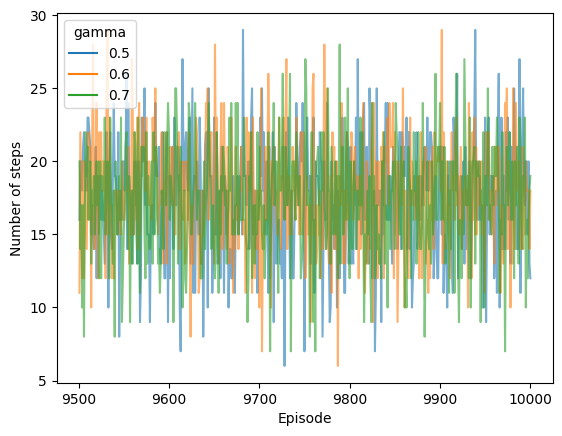

In [56]:
visualising_helper.multiple_line_plot(pd.DataFrame(result_dict_gamma_v3).tail(500),
                                      title='Steps count to win for the last 500 episodes',
                                      x_label='Episode',
                                      y_label='Number of steps',
                                      legend_title='gamma')

In [57]:
optimal_gamma = 0.7

# Train again with best parameters and perform

In [58]:
optimised_q_table, _ = q_learning(
        env=env,
        penalty=reward_dict.get("penalty"),
        max_eps=max_eps,
        alpha=optimal_alpha,
        gamma=optimal_gamma,
        epsilon_start=1,
        strategy=optimal_epsilon_strategy,
        epsilon_decay=optimal_epsilon_decay
    )

Episode: 10000
Training finished.



In [59]:
sequences = cab_perform(env, optimised_q_table, reward_dict, 10)

In [60]:
visualising_helper.display_(sequences)

+---------------+
|R: | : : |G: : |
| : : | : | : : |
| : : : : : : : |
| | : : : | : : |
|Y| : | : | : |B|
| : : | : : : : |
| : : | : | : : |
| : : |K: | : : |
+---------------+
Action: Drop-off
State: 156
Action: 5
Reward: 51


Note that the agent performed seamlessly in most of the cases, however, there is some episode that we can see it wandering around certain confusing point before finishing the work. This creates room for further improvement.

# Test Cab-v2

In [61]:
env_v2 = CabEnvV2()
env_v2.reset()
env_v2.render()

+-----------------+
|R: | : : |G: | : |
| : : | : | : : : |
| : : : : : : : : |
| | : : : | : : : |
|Y| : | : | : |B: |
| : : | | : : : : |
| : : | : | : : : |
| : : |K: | : : | |
| : : | : | : : |M|
+-----------------+



In [62]:
print(f'-- Environment attributes --'
      f'\nAction space: {env_v2.action_space.n}'
      f'\nState space: {env_v2.observation_space.n}')

-- Environment attributes --
Action space: 6
State space: 3402


This is just purely for testing the new implementation of environment only, the research will not be conducted on this environment.